In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2023-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2023-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Tesla=yf.Ticker("TSLA")#Using the Ticker function enter the ticker symbol of the stock to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

tesla_data=Tesla.history(period="max")#Using the ticker object and the function history extract stock information and save it in a dataframe

tesla_data.reset_index(inplace=True)#Reset the index 
tesla_data.head()#display the first five rows of the tesla_data dataframe using the head function

#webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm

url_tesla='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data_tesla=requests.get(url_tesla).text #Save the text of the response as a variable

beautiful_soup=BeautifulSoup(html_data_tesla,'html5lib') #Parse the html data using beautiful_soup

#insert the extract the table with "Tesla Quarterly Revenue" and store it into a dataframe named tesla_revenue. The dataframe columns updated to Date and Revenue.
read_html_pandas_data_tesla = pd.read_html(str(beautiful_soup))
tesla_revenue=read_html_pandas_data_tesla[1]
tesla_revenue=tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)':'Date','Tesla Quarterly Revenue(Millions of US $).1':'Revenue'})

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"") #remove the comma and dollar sign from the Revenue column

# remove an null or empty strings in the Revenue column

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]





C:\Users\maina\AppData\Local\Temp\ipykernel_12752\2983798976.py:44: FutureWarning:

The default value of regex will change from True to False in a future version.



In [3]:
tesla_revenue.tail()#Display the last 5 row of the tesla_revenue dataframe

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [5]:
url_gamestop='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_gamestop=requests.get(url_gamestop).text

beautiful_soup_gamestop=BeautifulSoup(html_data_gamestop,'html5lib')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in beautiful_soup_gamestop.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    reve = col[1].text
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":reve}, ignore_index=True)    
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

C:\Users\maina\AppData\Local\Temp\ipykernel_12752\286535666.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\maina\AppData\Local\Temp\ipykernel_12752\286535666.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\maina\AppData\Local\Temp\ipykernel_12752\286535666.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\maina\AppData\Local\Temp\ipykernel_12752\286535666.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\maina\AppData\Local\Temp\ipykernel_12752\286535666.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

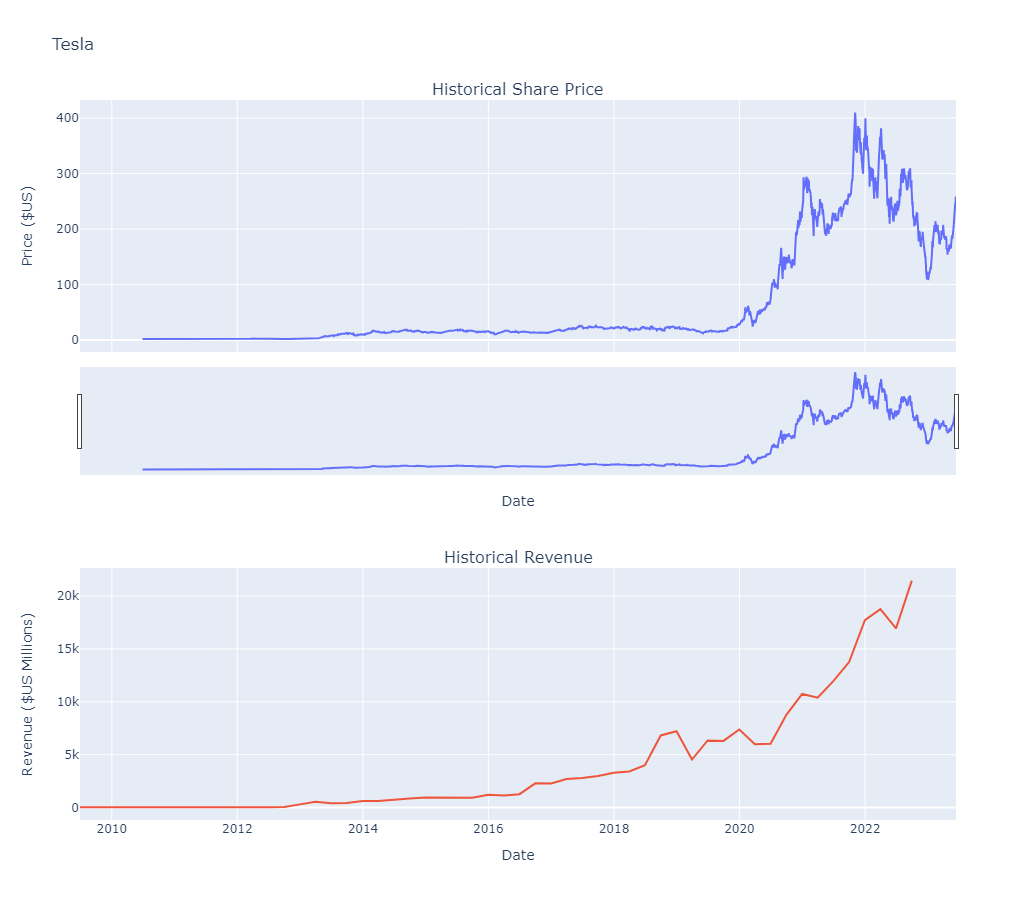

In [4]:
make_graph(tesla_data,tesla_revenue, 'Tesla')

In [8]:
GameStop=yf.Ticker("GME")
gme_data=GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [6]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


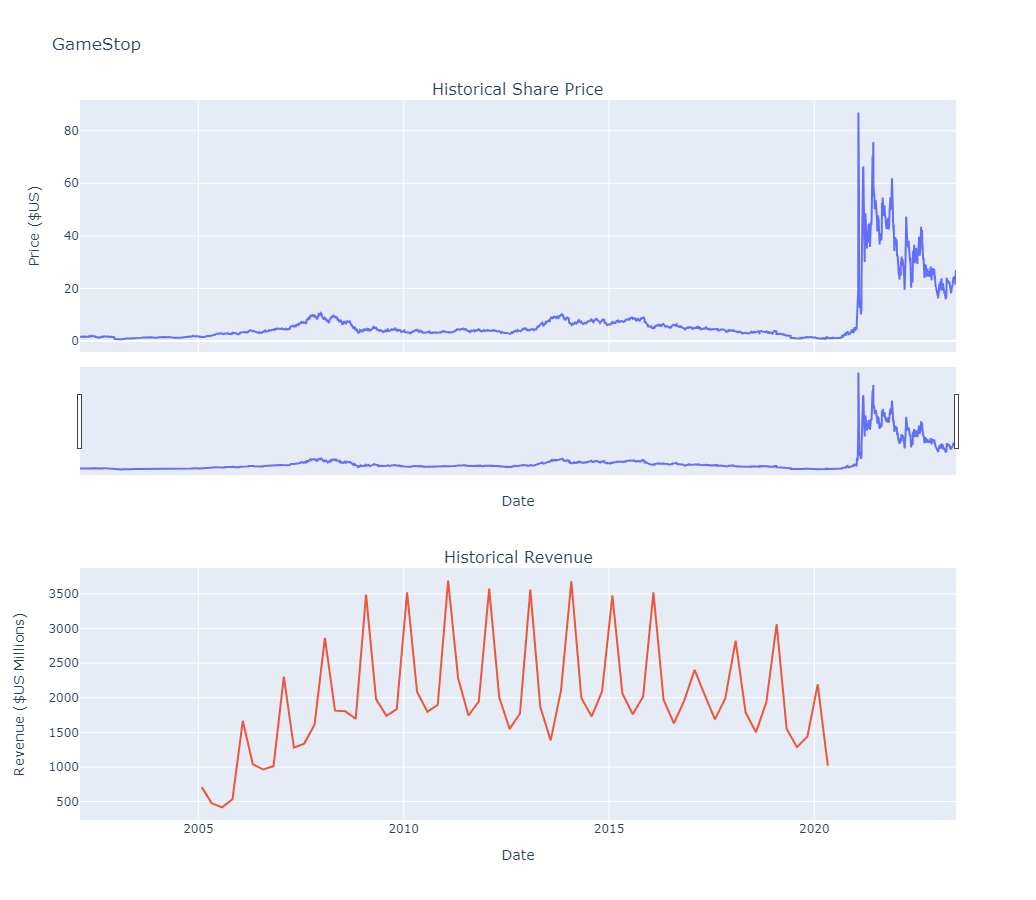

In [9]:
make_graph(gme_data, gme_revenue, 'GameStop')